In [0]:
# Implementing Harris Corners from Scratch

In [0]:
import numpy as np
import cv2
import scipy.io
import os
from numpy.linalg import norm
from matplotlib import pyplot as plt
from numpy.linalg import det
from numpy.linalg import inv
from scipy.linalg import rq
from numpy.linalg import svd
import scipy.ndimage as ndimage

import random


In [23]:
folder_id = '1nrXjo4X-E3vcRsZ3bd08tR4pv0RVSczh' # Enter the last part of the URL of the Google Drive folder here

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': '\'' + folder_id + "\' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)
  
os.chdir(local_download_path)

title: keble_a.jpg, id: 1CaBnLZVKRV3r-IUQsKJMYDEyA83Naodn
downloading to /root/data/keble_a.jpg
title: keble_b.jpg, id: 1cpXG0rvlOGMCj4FbjXAUyw-HZAKDC4lJ
downloading to /root/data/keble_b.jpg
title: keble_c.jpg, id: 1dO_t5RzRUZQHk-QW0uaV6syjSdb27Zgb
downloading to /root/data/keble_c.jpg
title: sift_features.mat, id: 12P3qwZDIynt6G6h-qQwAiwrerZ0TGjGD
downloading to /root/data/sift_features.mat
title: corners.mat, id: 12gU_phqObqEcZ45SFtesVBbTBxcE4rzf
downloading to /root/data/corners.mat


In [0]:
harris_corners= scipy.io.loadmat('corners.mat')
harris_corners_center = harris_corners['corners_center']
harris_corners_left = harris_corners['corners_left']
harris_corners_right = harris_corners['corners_right']

sift_desc = scipy.io.loadmat('sift_features.mat')
sift_desc_left = sift_desc['sift_left']
sift_desc_center = sift_desc['sift_center']
sift_desc_right = sift_desc['sift_right']


left_image = plt.imread('keble_a.jpg')
center_image = plt.imread('keble_b.jpg')
right_image = plt.imread('keble_c.jpg')


In [0]:
# Function to calculate Harris corners on an Image, of kernel size, 'size', k, and threshold, 'th'

In [0]:
def harriscorners(input_image,size,k,th):
  gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY) # Converting image to grayscale
  width,height = gray_image.shape
  
  Ix = cv2.Sobel(np.float32(gray_image), cv2.CV_32F, 1, 0) # Calculate Gradient across x
  Iy = cv2.Sobel(np.float32(gray_image), cv2.CV_32F, 0, 1) # Calculating Gradient across y
  Ix = ndimage.gaussian_filter(Ix, sigma=(3, 3), order=0)
  Iy = ndimage.gaussian_filter(Iy, sigma=(3, 3), order=0)
  Ixx = Ix**2
  Iyy= Iy**2
  Ixy = Ix*Iy

  harris_corners=[]
  for i in range(size,width-size):
    for j in range(size,height-size):
      
      Ix1=Ixx[i:i+size,j:j+size] # Taking a window patch across each pixel
      Iy1=Iyy[i:i+size,j:j+size]
      Ixy1 = Ixy[i:i+size,j:j+size]
      

    
      Ixx1 = (Ix1.sum())**2
    
      Iyy1 = (Iy1.sum())**2
    
      Ixy2 = (Ixy1.sum())**2
   
      det_M = Ixx1*Iyy1 - Ixy2*Ixy2
      trace_M = Ixx1+Iyy1
    
      f = det_M - k*(trace_M)**2 # Harris Condition
      f= det_M/trace_M
      #print(f)
    
      if f>th:
        harris_corners.append([i,j])
          
         
  print(len(harris_corners))
  return harris_corners
          
     

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


215


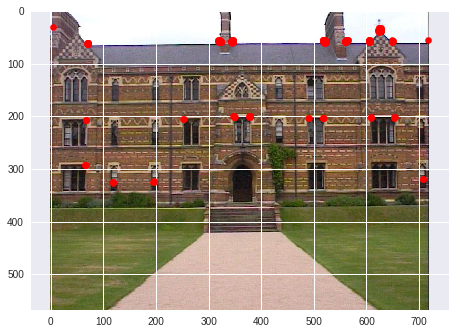

In [52]:
harris_corners_center = harriscorners(center_image,3,0.06,10**8)
harris_corners1= np.array(harris_corners_center)
#print(harris_corners1)
plt.imshow(center_image)

for i in range(0,len(harris_corners_center)):
  plt.scatter(x=[harris_corners1[i,1]], y=[harris_corners1[i,0]], c='r', s=40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


256


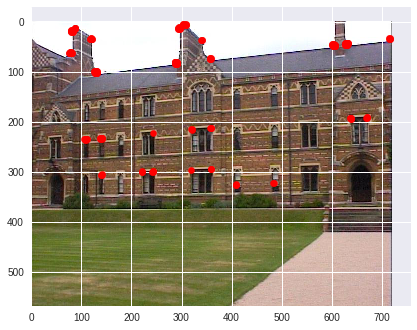

In [53]:
harris_corners_left = harriscorners(left_image,3,0.06,10**8)
harris_corners1= np.array(harris_corners_left)
#print(harris_corners1)
plt.imshow(left_image)

for i in range(0,len(harris_corners_left)):
  plt.scatter(x=[harris_corners1[i,1]], y=[harris_corners1[i,0]], c='r', s=40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


398


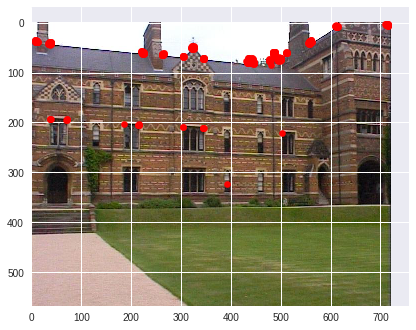

In [54]:
harris_corners_right = harriscorners(right_image,3,0.06,10**8)
harris_corners1= np.array(harris_corners_right)
#print(harris_corners1)
plt.imshow(right_image)

for i in range(0,len(harris_corners_right)):
  plt.scatter(x=[harris_corners1[i,1]], y=[harris_corners1[i,0]], c='r', s=40)